<h1>Deep Learning
Assignment 1 - Fashion MNIST Dataset
<h3>Ilias Giannakos - p3352007<br>
Elena Adamidi - p3352002<br>

<h5> Import Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Set Seed for reproducibility

In [2]:
from numpy.random import seed
from tensorflow.random import set_seed
seed(42)
set_seed(42)

<h5> Load Fashion MNIST dataset and check it has been loaded correctly

In [55]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#check that fashion mnist has been loaded correctly
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

<h5> Check the distribution of each label

In [56]:
print(np.bincount(y_train))
print(np.bincount(y_test))
#train & test dataset is balanced (same number of occurencies between different clothes)

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


<h5> Map labels to their original description

In [57]:
label_description = {0: "T-shirt",1: "Trouser",
2: "Pullover", 3: "Dress", 
4: "Coat", 5:"Sandal",6:"Shirt",
7:"Sneaker",8:"Bag",9:"Ankle Boot"}

print("Total fashion mnist categories are",len(label_description))

Total fashion mnist categories are 10


<h5> Preprocessing

In [58]:
#make y values categorical
y_train = tf.keras.utils.to_categorical(y_train, len(label_description))
y_test = tf.keras.utils.to_categorical(y_test, len(label_description))

#normalize pixels
x_train = (x_train.astype("float32") / 255)
x_test = (x_test.astype("float32") / 255)

#flatten the train and test data
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)

#create a development set from training set for tuning
x_train, x_dev, y_train, y_dev = train_test_split(x_train,y_train, test_size=0.15, random_state=42)

Map the one-hot-encoded y values back to human-readable descriptions

In [29]:
idx = 4
print("Y train vector of index {} is:".format(idx),y_train[idx])
print("Y train of index {} original value is:".format(idx),y_train[idx].argmax())

Y train vector of index 4 is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Y train of index 4 original value is: 6


Visualize the data

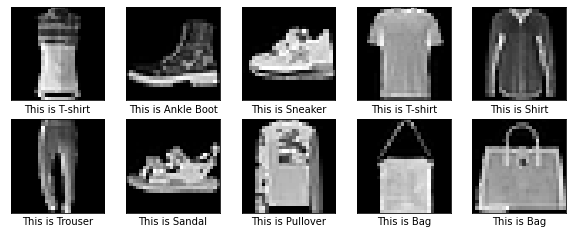

In [30]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    pixels = x_train[i].reshape((28,28))
    label = y_train[i].argmax() #with argmax we can get back the original value
    
    #plt.title('Label is {}'.format(label_description.get(label)))
    plt.imshow(pixels, cmap='gray')
    plt.xlabel("This is {}".format(label_description.get(label)))

plt.show()


<h4>Multi Layer Perceptron (MLP) Modelling

In [31]:
def create_model_mlp(num_hidden_layers: int, num_of_neurons: int, activation_hidden:str = "relu", optimizer = None, epochs:int = 100, dropout:int = None):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=784, name="Input layer"))
    for layer in range(num_hidden_layers-1):
        model.add(tf.keras.layers.Dense(num_of_neurons, activation=activation_hidden))
        if dropout:
            model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(int(num_of_neurons/2), activation=activation_hidden))
    model.add(tf.keras.layers.Dense(len(label_description), activation="softmax"))
    opt = optimizer
    model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model
    



Default Values:

In [32]:
epochs = 70
batch_size = 64
callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
    min_delta=0,
    patience=6,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

In [34]:
#baseline model, 2 hidden layers, 128 & 64 neurons each layers & SGD optimizer
model = create_model_mlp(num_hidden_layers =2 ,num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.SGD())

In [35]:
history = model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_dev, y_dev)
)

Epoch 1/70
797/797 [==============================] - 3s 3ms/step - loss: 0.9511 - accuracy: 0.6982 - val_loss: 0.6524 - val_accuracy: 0.7828
Epoch 2/70
797/797 [==============================] - 2s 3ms/step - loss: 0.5726 - accuracy: 0.8051 - val_loss: 0.5429 - val_accuracy: 0.8157
Epoch 3/70
797/797 [==============================] - 2s 2ms/step - loss: 0.5096 - accuracy: 0.8222 - val_loss: 0.5010 - val_accuracy: 0.8266
Epoch 4/70
797/797 [==============================] - 2s 2ms/step - loss: 0.4757 - accuracy: 0.8356 - val_loss: 0.4760 - val_accuracy: 0.8368
Epoch 5/70
797/797 [==============================] - 2s 2ms/step - loss: 0.4550 - accuracy: 0.8419 - val_loss: 0.4580 - val_accuracy: 0.8396
Epoch 6/70
797/797 [==============================] - 2s 2ms/step - loss: 0.4392 - accuracy: 0.8471 - val_loss: 0.4542 - val_accuracy: 0.8363
Epoch 7/70
797/797 [==============================] - 2s 2ms/step - loss: 0.4255 - accuracy: 0.8513 - val_loss: 0.4318 - val_accuracy: 0.8463
Epoch 

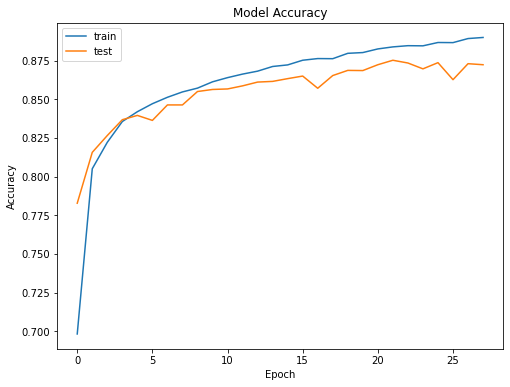

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
#results of first model on test dataset
_, val_accuracy = model.evaluate(x_test,y_test, verbose=0)
print(val_accuracy)

0.8665000200271606


In [41]:
#baseline model, 2 hidden layers, 128 & 64 neurons each layers & Adam optimizer
model2 = create_model_mlp(num_hidden_layers = 2 ,num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.Adam())
history2 = model2.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_dev, y_dev)
)

print("Test accuracy is ",model2.evaluate(x_test,y_test)[1])


Epoch 1/70
797/797 [==============================] - 3s 3ms/step - loss: 0.5207 - accuracy: 0.8176 - val_loss: 0.4125 - val_accuracy: 0.8552
Epoch 2/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3801 - accuracy: 0.8615 - val_loss: 0.4175 - val_accuracy: 0.8487
Epoch 3/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3431 - accuracy: 0.8746 - val_loss: 0.3586 - val_accuracy: 0.8741
Epoch 4/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3193 - accuracy: 0.8822 - val_loss: 0.3365 - val_accuracy: 0.8790
Epoch 5/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3015 - accuracy: 0.8897 - val_loss: 0.3312 - val_accuracy: 0.8787
Epoch 6/70
797/797 [==============================] - 2s 2ms/step - loss: 0.2843 - accuracy: 0.8952 - val_loss: 0.3375 - val_accuracy: 0.8772
Epoch 7/70
797/797 [==============================] - 2s 2ms/step - loss: 0.2727 - accuracy: 0.8988 - val_loss: 0.3507 - val_accuracy: 0.8747
Epoch 

In [42]:
#results of second model on test dataset
_, val_accuracy = model2.evaluate(x_test,y_test, verbose=0)
print(val_accuracy)

0.8847000002861023


As we observe, Adam optimizer achieves better performance (0.88,4 val accuracy) while taking much less epochs to converge.

In [43]:
#We now try with 5 hidden layers, 128x4 each layer + 64 neurons on last & Adam optimizer
model3 = create_model_mlp(num_hidden_layers = 5, num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.Adam())
history = model3.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_dev, y_dev)
)

Epoch 1/70
797/797 [==============================] - 3s 3ms/step - loss: 0.5503 - accuracy: 0.8032 - val_loss: 0.4464 - val_accuracy: 0.8414
Epoch 2/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3834 - accuracy: 0.8587 - val_loss: 0.4197 - val_accuracy: 0.8421
Epoch 3/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3458 - accuracy: 0.8723 - val_loss: 0.3720 - val_accuracy: 0.8664
Epoch 4/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3206 - accuracy: 0.8820 - val_loss: 0.3453 - val_accuracy: 0.8751
Epoch 5/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3028 - accuracy: 0.8882 - val_loss: 0.3251 - val_accuracy: 0.8812
Epoch 6/70
797/797 [==============================] - 2s 3ms/step - loss: 0.2881 - accuracy: 0.8923 - val_loss: 0.3317 - val_accuracy: 0.8824
Epoch 7/70
797/797 [==============================] - 2s 3ms/step - loss: 0.2757 - accuracy: 0.8975 - val_loss: 0.3656 - val_accuracy: 0.8711
Epoch 

In [44]:
_, val_accuracy = model3.evaluate(x_test,y_test)
print(val_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8834
0.883400022983551


In [45]:
print("the model with 3 extra layers has less val accuracy than the previous with 2 hidden ({}), therefore we discard it".format(model2.evaluate(x_test,y_test, verbose=0)[1]))

the model with 3 extra layers has less val accuracy than the previous with 2 hidden (0.8847000002861023), therefore we discard it


In [46]:
predictions = model2.predict(x_test)
print("probability distribution of each class", predictions[0]) 
print("Model predicts this is",label_description.get(np.argmax(predictions[0])), "and the true label is", label_description.get(np.argmax(y_test[0])))

probability distribution of each class [1.6642143e-07 2.7821756e-10 1.9010091e-07 5.8903180e-09 1.4917086e-08
 1.8769913e-04 2.2726576e-07 1.0131042e-02 3.8669551e-08 9.8968059e-01]
Model predicts this is Ankle Boot and the true label is Ankle Boot


In [49]:
#model with 2 hidden layers (same as model2) but now with dropout
model4 = create_model_mlp(num_hidden_layers = 2 ,num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.Adam(), dropout=0.1)
history4 = model4.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_dev, y_dev)
)

print("Test accuracy is ",model4.evaluate(x_test,y_test)[1])
print("This is a tiny improvement over model2, but as dropout regularizes the model we will keep this as our baseline model")

Epoch 1/70
797/797 [==============================] - 3s 3ms/step - loss: 0.5497 - accuracy: 0.8070 - val_loss: 0.4247 - val_accuracy: 0.8487
Epoch 2/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3913 - accuracy: 0.8583 - val_loss: 0.4137 - val_accuracy: 0.8468
Epoch 3/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3592 - accuracy: 0.8687 - val_loss: 0.3603 - val_accuracy: 0.8686
Epoch 4/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3346 - accuracy: 0.8781 - val_loss: 0.3458 - val_accuracy: 0.8762
Epoch 5/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3190 - accuracy: 0.8827 - val_loss: 0.3367 - val_accuracy: 0.8778
Epoch 6/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3038 - accuracy: 0.8870 - val_loss: 0.3329 - val_accuracy: 0.8813
Epoch 7/70
797/797 [==============================] - 2s 3ms/step - loss: 0.2929 - accuracy: 0.8907 - val_loss: 0.3358 - val_accuracy: 0.8780
Epoch 

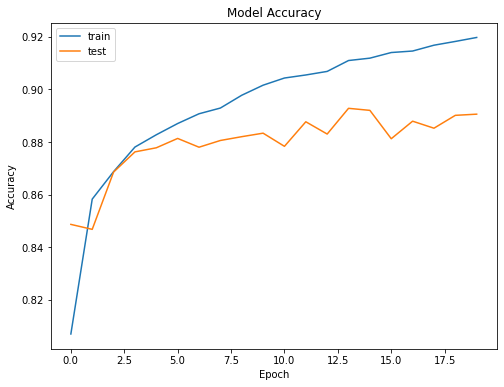

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h4>CNN's

In [59]:
# Reshape training and testing image
#we need to reshape your data is that Tensorflow expects a certain input shape for its Deep Learning Model, i.e., in this case, a Convolution Neural Network, specifically
#(<number of images>, <image x_dim>, <image y_dim>, <number of channels>)
train_X_cnn = x_train.reshape(-1, 28, 28, 1)
dev_X_cnn = x_dev.reshape(-1, 28, 28, 1)
test_x_cnn = x_test.reshape(-1,28,28,1)

In [61]:
model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model5.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model5.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(64, activation='relu'))
model5.add(tf.keras.layers.Dense(10, activation = "softmax"))
model5.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [62]:
model5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [63]:
history5 = model5.fit(
    train_X_cnn, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (dev_X_cnn, y_dev)
)

Epoch 1/70
797/797 [==============================] - 27s 33ms/step - loss: 0.5994 - accuracy: 0.7793 - val_loss: 0.4039 - val_accuracy: 0.8567
Epoch 2/70
797/797 [==============================] - 27s 34ms/step - loss: 0.3683 - accuracy: 0.8674 - val_loss: 0.3642 - val_accuracy: 0.8682
Epoch 3/70
797/797 [==============================] - 25s 31ms/step - loss: 0.3154 - accuracy: 0.8844 - val_loss: 0.3134 - val_accuracy: 0.8883
Epoch 4/70
797/797 [==============================] - 25s 31ms/step - loss: 0.2828 - accuracy: 0.8968 - val_loss: 0.2953 - val_accuracy: 0.8910
Epoch 5/70
797/797 [==============================] - 24s 30ms/step - loss: 0.2585 - accuracy: 0.9038 - val_loss: 0.2767 - val_accuracy: 0.8999
Epoch 6/70
797/797 [==============================] - 25s 32ms/step - loss: 0.2359 - accuracy: 0.9128 - val_loss: 0.2616 - val_accuracy: 0.9062
Epoch 7/70
797/797 [==============================] - 25s 32ms/step - loss: 0.2179 - accuracy: 0.9190 - val_loss: 0.2681 - val_accuracy:

In [64]:
_, val_accuracy = model5.evaluate(test_x_cnn,y_test, verbose=0)
print(val_accuracy)

0.9133999943733215


In [65]:
#final CNN (same as before) but with dropout 

model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model6.add(tf.keras.layers.MaxPooling2D((2, 2)))
model6.add(tf.keras.layers.Dropout(0.2))
model6.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(tf.keras.layers.MaxPooling2D((2, 2)))
model6.add(tf.keras.layers.Dropout(0.2))
model6.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dense(64, activation='relu'))
model6.add(tf.keras.layers.Dense(10, activation = "softmax"))
model6.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [67]:
history6 = model6.fit(
    train_X_cnn, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (dev_X_cnn, y_dev)
)
_, val_accuracy = model6.evaluate(test_x_cnn,y_test, verbose=0)
print(val_accuracy)

Epoch 1/70
797/797 [==============================] - 29s 37ms/step - loss: 0.4694 - accuracy: 0.8285 - val_loss: 0.3849 - val_accuracy: 0.8617
Epoch 2/70
797/797 [==============================] - 28s 35ms/step - loss: 0.3718 - accuracy: 0.8649 - val_loss: 0.3274 - val_accuracy: 0.8808
Epoch 3/70
797/797 [==============================] - 30s 38ms/step - loss: 0.3267 - accuracy: 0.8800 - val_loss: 0.3055 - val_accuracy: 0.8893
Epoch 4/70
797/797 [==============================] - 29s 37ms/step - loss: 0.3017 - accuracy: 0.8895 - val_loss: 0.2939 - val_accuracy: 0.8942
Epoch 5/70
797/797 [==============================] - 29s 37ms/step - loss: 0.2827 - accuracy: 0.8948 - val_loss: 0.2701 - val_accuracy: 0.9019
Epoch 6/70
797/797 [==============================] - 30s 37ms/step - loss: 0.2642 - accuracy: 0.9020 - val_loss: 0.2579 - val_accuracy: 0.9049
Epoch 7/70
797/797 [==============================] - 30s 37ms/step - loss: 0.2497 - accuracy: 0.9076 - val_loss: 0.2560 - val_accuracy:

The model6 has almost identical accuracy on test dataset with model5, yet because it used regularization we will use it as our final model.

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

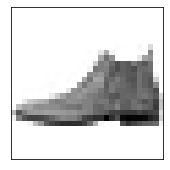

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()